# Explore here

In [4]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


databse = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

#visualize dataframe
databse.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#dimensions
databse.shape


(48895, 16)

In [6]:
#obtener info de tipos de datos
databse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# verificar duplicate
# databse.drop("id", axis = 1).duplicated().sum()
print(f"Número de ids duplicados {databse['id'].duplicated().sum()}")
print(f"Número de nombres duplicados {databse['name'].duplicated().sum()}")
print(f"Número de host ids duplicados {databse['host_id'].duplicated().sum()}")

# si tengo que eliminar duplicados, usaría lo siguiente
#databse.drop_duplicates("id", axis = 1)

Número de ids duplicados 0
Número de nombres duplicados 989
Número de host ids duplicados 11438


In [8]:
data_limpia = databse.drop([ "id" ,"name" , "host_name", "last_review", "reviews_per_month", "calculated_host_listings_count",], axis=1, inplace=False)
data_limpia.head()
#data_limpia.shape
# id, host name, umber reviews, last review, reviews per month, calculated host listing count

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0


/tmp/ipykernel_2264/3374445737.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=45)


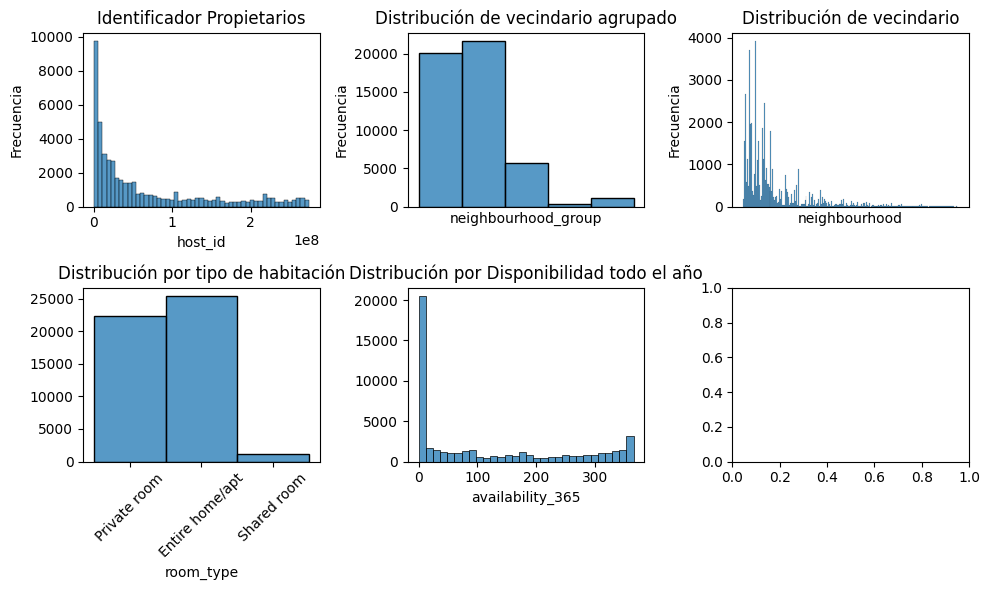

In [9]:
#Graficación variables categóricos
#host_id , neighbourhood_group , neighbourhood , room_type , availability_365

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 6))


# Create a multiple histogram
sns.histplot(ax = axis[0,0], data = data_limpia, x = "host_id")
axis[0,0].set_title("Identificador Propietarios") #Titulo grafico izq
axis[0,0].set_ylabel("Frecuencia") # label de y
#axis[0,0].grid(True) # cuadricula activada
#axis[0,0].grid(True, linestyle="--", linewidth=0.5, color="red") # cuadricula curiosa

sns.histplot(ax = axis[0,1], data = data_limpia, x = "neighbourhood_group").set_xticks([])
axis[0,1].set_title("Distribución de vecindario agrupado") #Titulo grafico izq
axis[0,1].set_ylabel("Frecuencia") # label de y
#axis[0,1].grid(True) # cuadricula activada
#axis[0,1].grid(True, linestyle="--", linewidth=0.5, color="red") # cuadricula curiosa

sns.histplot(ax = axis[0,2], data = data_limpia, x = "neighbourhood").set_xticks([])
axis[0,2].set_title("Distribución de vecindario") #Titulo grafico izq
axis[0,2].set_ylabel("Frecuencia") # label de y
#axis[0,2].grid(True) # cuadricula activada
#axis[0,2].grid(True, linestyle="--", linewidth=0.5, color="red") # cuadricula curiosa

sns.histplot(ax = axis[1,0], data = data_limpia, x = "room_type")
axis[1,0].set_title("Distribución por tipo de habitación")  # Título del segundo subplot
axis[1,0].set_ylabel(None)
axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=45)
#axis[1,0].grid(True)
#axis[1,0].grid(True, linestyle="--", linewidth=0.5, color="red")

sns.histplot(ax = axis[1,1], data = data_limpia, x = "availability_365")
axis[1,1].set_title("Distribución por Disponibilidad todo el año")  # Título del segundo subplot
axis[1,1].set_ylabel(None)
#axis[1,2].grid(True)
#axis[1,2].grid(True, linestyle="--", linewidth=0.5, color="red")


plt.tight_layout()
plt.show()



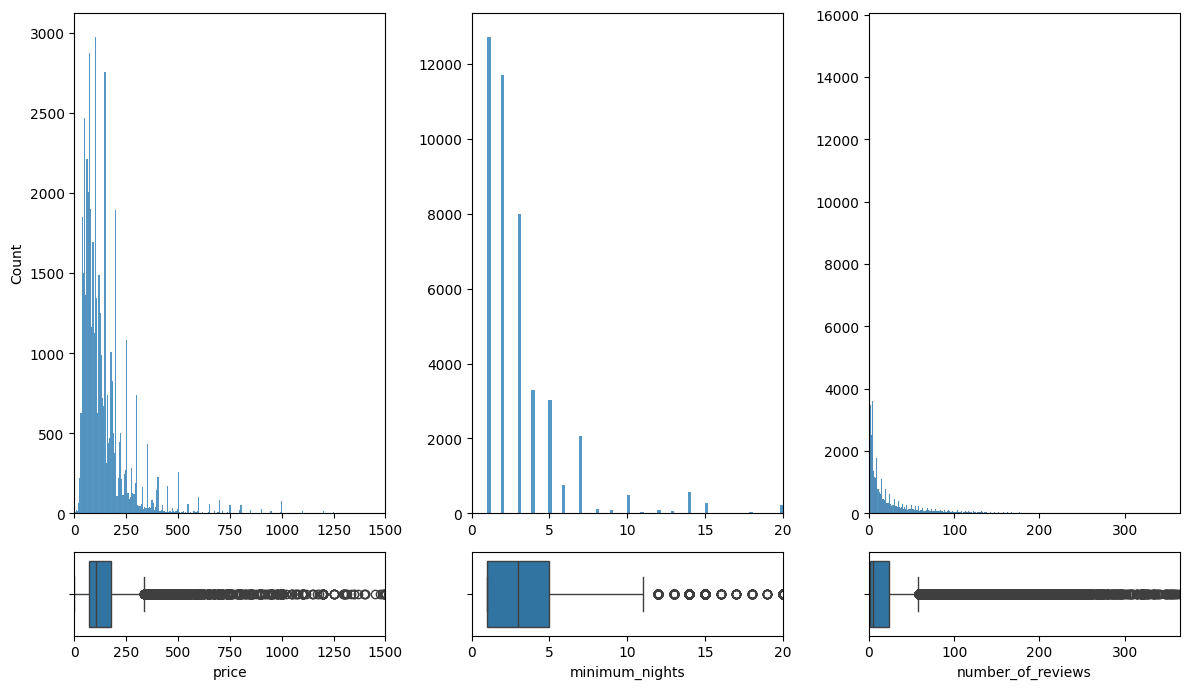

In [10]:
#Graficación variables Numéricos
# price , minimum_nights , number_of_reviews

fig, axis = plt.subplots(2,3 , figsize = (12, 7), gridspec_kw={"height_ratios":[6,1]})


# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data_limpia, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data_limpia, x = "price")
sns.histplot(ax = axis[0, 1], data = data_limpia, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data_limpia, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = data_limpia, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data_limpia, x = "number_of_reviews")
axis[0, 0].set_xlim(0, 1500)
axis[1, 0].set_xlim(0, 1500)
axis[0, 1].set_xlim(0, 20)
axis[1, 1].set_xlim(0, 20)
axis[0, 2].set_xlim(0, 365)
axis[1, 2].set_xlim(0, 365)

# sns.histplot(ax = axis[1,1], data = data_limpia, x = "number_of_reviews")
# axis[1,1].set_title("Distribución por número de reviews")  # Título del segundo subplot
# axis[1,1].set_ylabel(None)
#axis[1,1].grid(True)
#axis[1,1].grid(True, linestyle="--", linewidth=0.5, color="red")

plt. tight_layout()
plt.show()

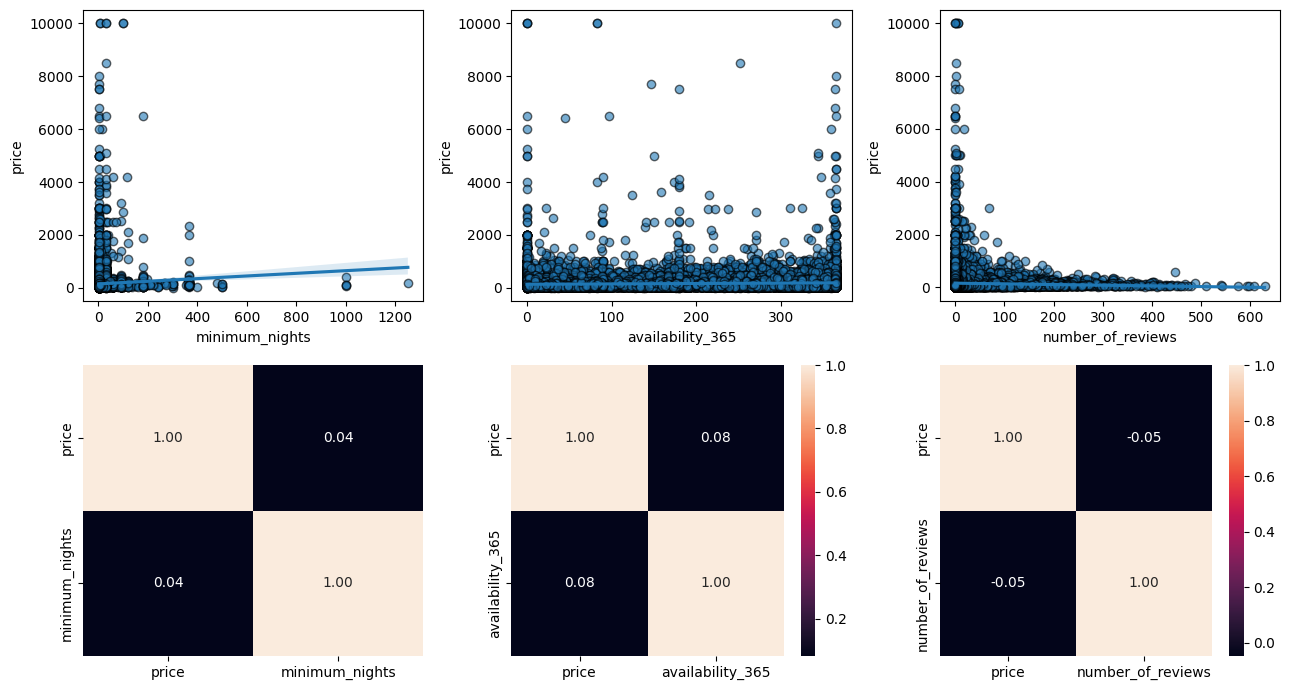

In [11]:
# verificar correlación y afinidad de variables
# numérico a numérico

fig, axis = plt.subplots(2, 3, figsize = (13, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0,0], data = data_limpia, x = "minimum_nights", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data = data_limpia, x = "availability_365", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])

sns.regplot(ax = axis[0,2], data = data_limpia, x = "number_of_reviews", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

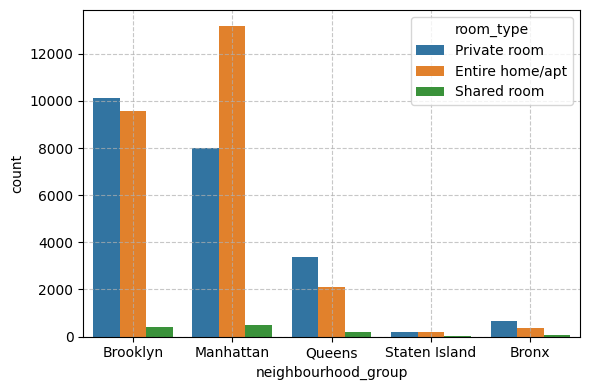

In [12]:
# verificar correlación y afinidad de variables
# categórico a categórico

plt.figure(figsize = (6, 4))
sns.countplot(data=data_limpia, x="neighbourhood_group", hue="room_type")
plt.grid(linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


Combinaciones de variables con varias predictoras



/tmp/ipykernel_2264/917840431.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)


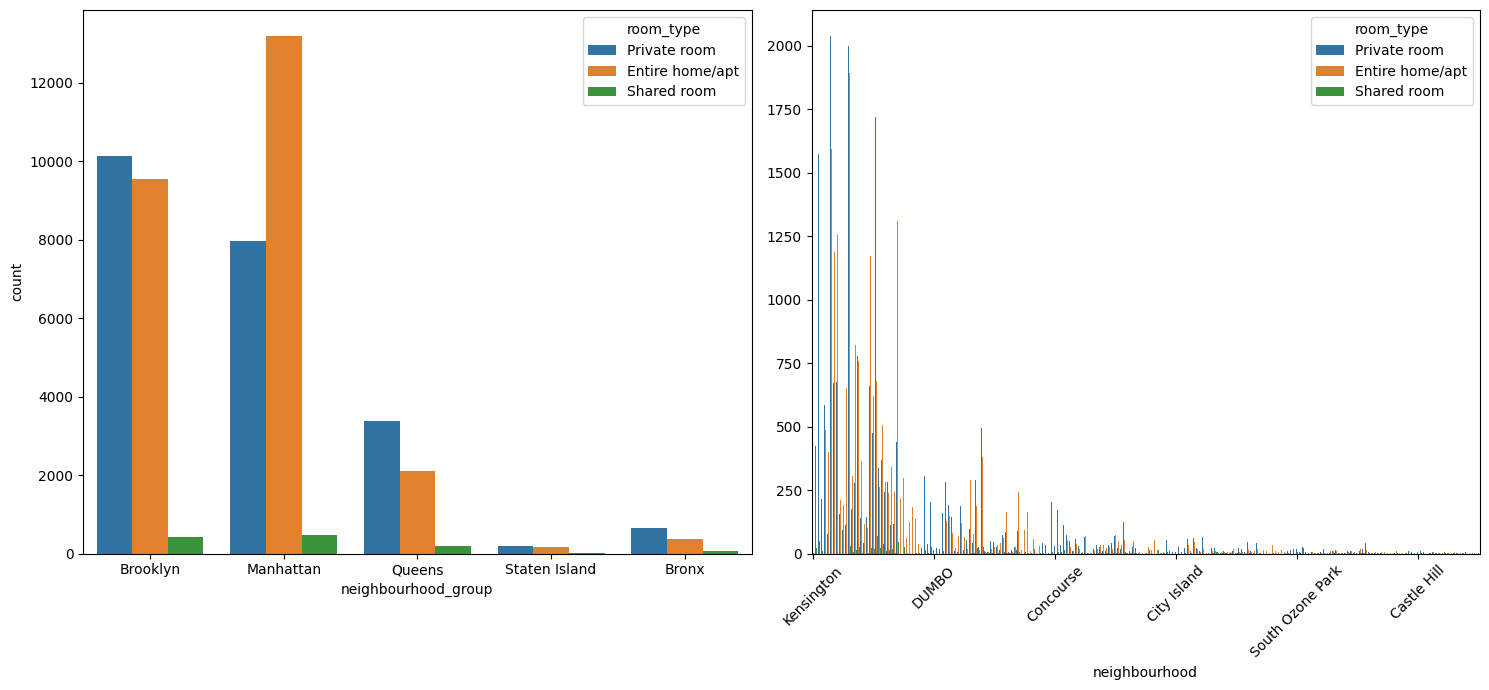

In [13]:
from matplotlib.ticker import MaxNLocator

fig, axis = plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(ax = axis[0], data = data_limpia, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = data_limpia, x = "neighbourhood", hue = "room_type").set(ylabel = None)
axis[1].xaxis.set_major_locator(MaxNLocator(nbins=6)) #limitar a 6 etiquetas
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2264/1238293200.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)  # Rotar etiquetas del eje X para legibilidad


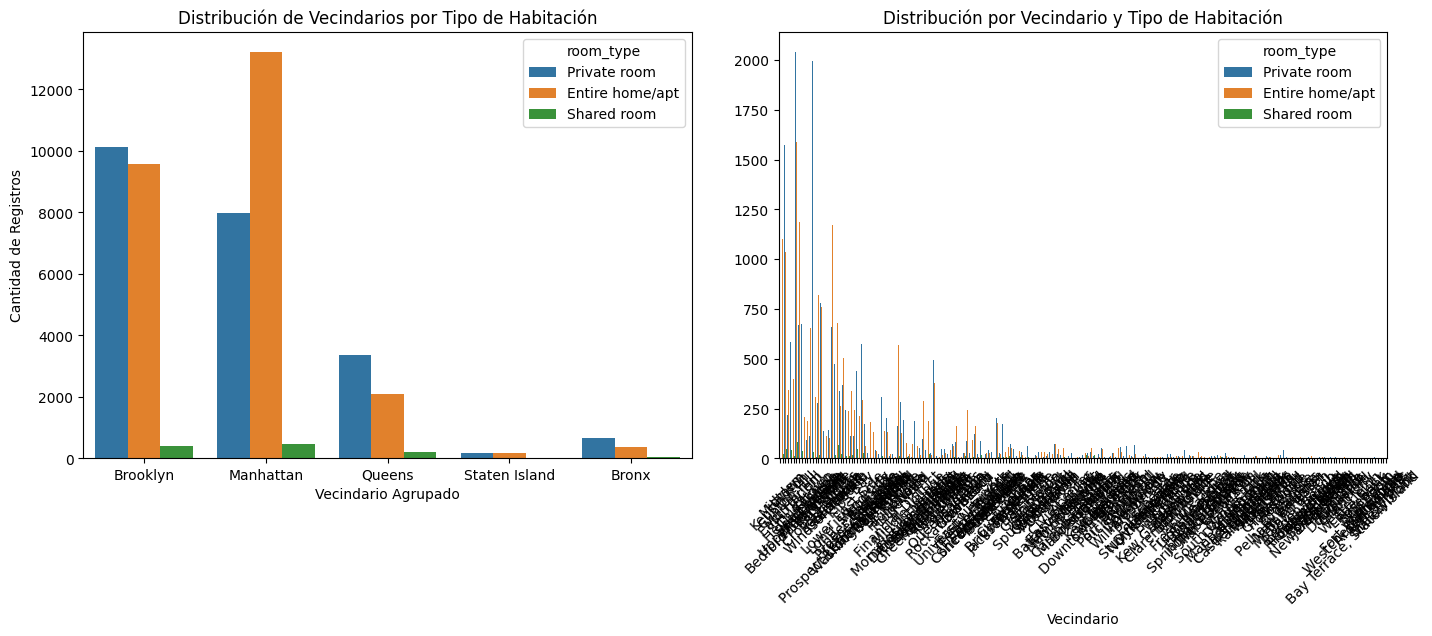

In [16]:
# Crear figura y subgráficas
fig, axis = plt.subplots(1, 2, figsize=(15, 7))

# Graficar el primer countplot
sns.countplot(ax=axis[0], data=data_limpia, x="neighbourhood_group", hue="room_type")
axis[0].set_title("Distribución de Vecindarios por Tipo de Habitación")  # Título para el primer gráfico
axis[0].set_xlabel("Vecindario Agrupado")  # Etiqueta del eje X
axis[0].set_ylabel("Cantidad de Registros")  # Etiqueta del eje Y

# Graficar el segundo countplot
sns.countplot(ax=axis[1], data=data_limpia, x="neighbourhood", hue="room_type")
axis[1].set_title("Distribución por Vecindario y Tipo de Habitación")  # Título para el segundo gráfico
axis[1].set_xlabel("Vecindario")  # Etiqueta del eje X
axis[1].set_ylabel(None)  # Eliminando la etiqueta del eje Y
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)  # Rotar etiquetas del eje X para legibilidad

# Ajustar espaciado entre subgráficas para evitar solapamientos
plt.tight_layout(pad=3.0)

# Mostrar el gráfico
plt.show()


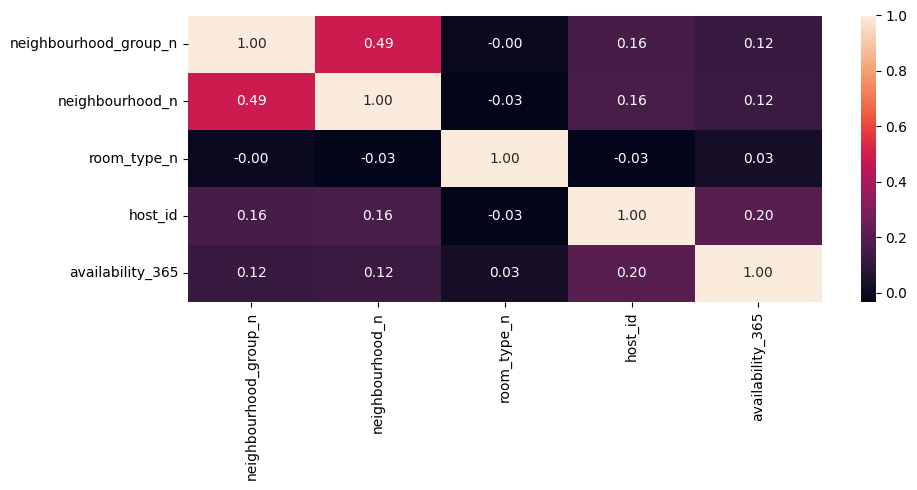

In [ ]:
data_limpia["neighbourhood_group_n"] = pd.factorize(data_limpia["neighbourhood_group"])[0]
data_limpia["room_type_n"] = pd.factorize(data_limpia["room_type"])[0]
data_limpia["neighbourhood_n"] = pd.factorize(data_limpia["neighbourhood"])[0]

fig, axis = plt.subplots(figsize=(10, 5))

sns.heatmap(data_limpia[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "host_id", "availability_365"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()


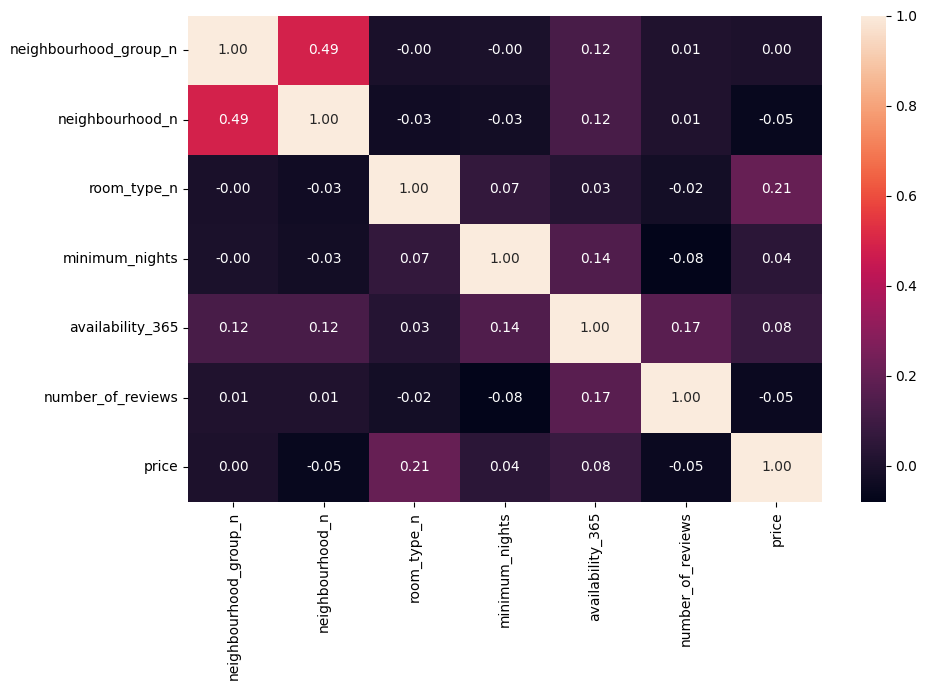

In [20]:
fig, axis = plt.subplots(figsize=(10, 7))

sns.heatmap(data_limpia[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "minimum_nights","availability_365","number_of_reviews","price"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()


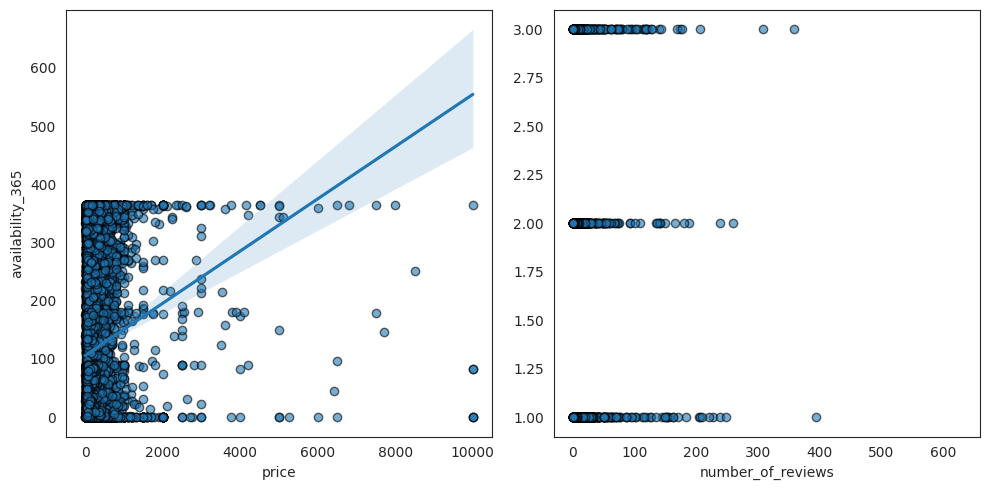

In [29]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data_limpia, x = "price", y = "availability_365", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[1], data = data_limpia, x = "number_of_reviews", y = "availability_365", scatter_kws={'edgecolor': 'k', 'alpha': 0.6}).set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

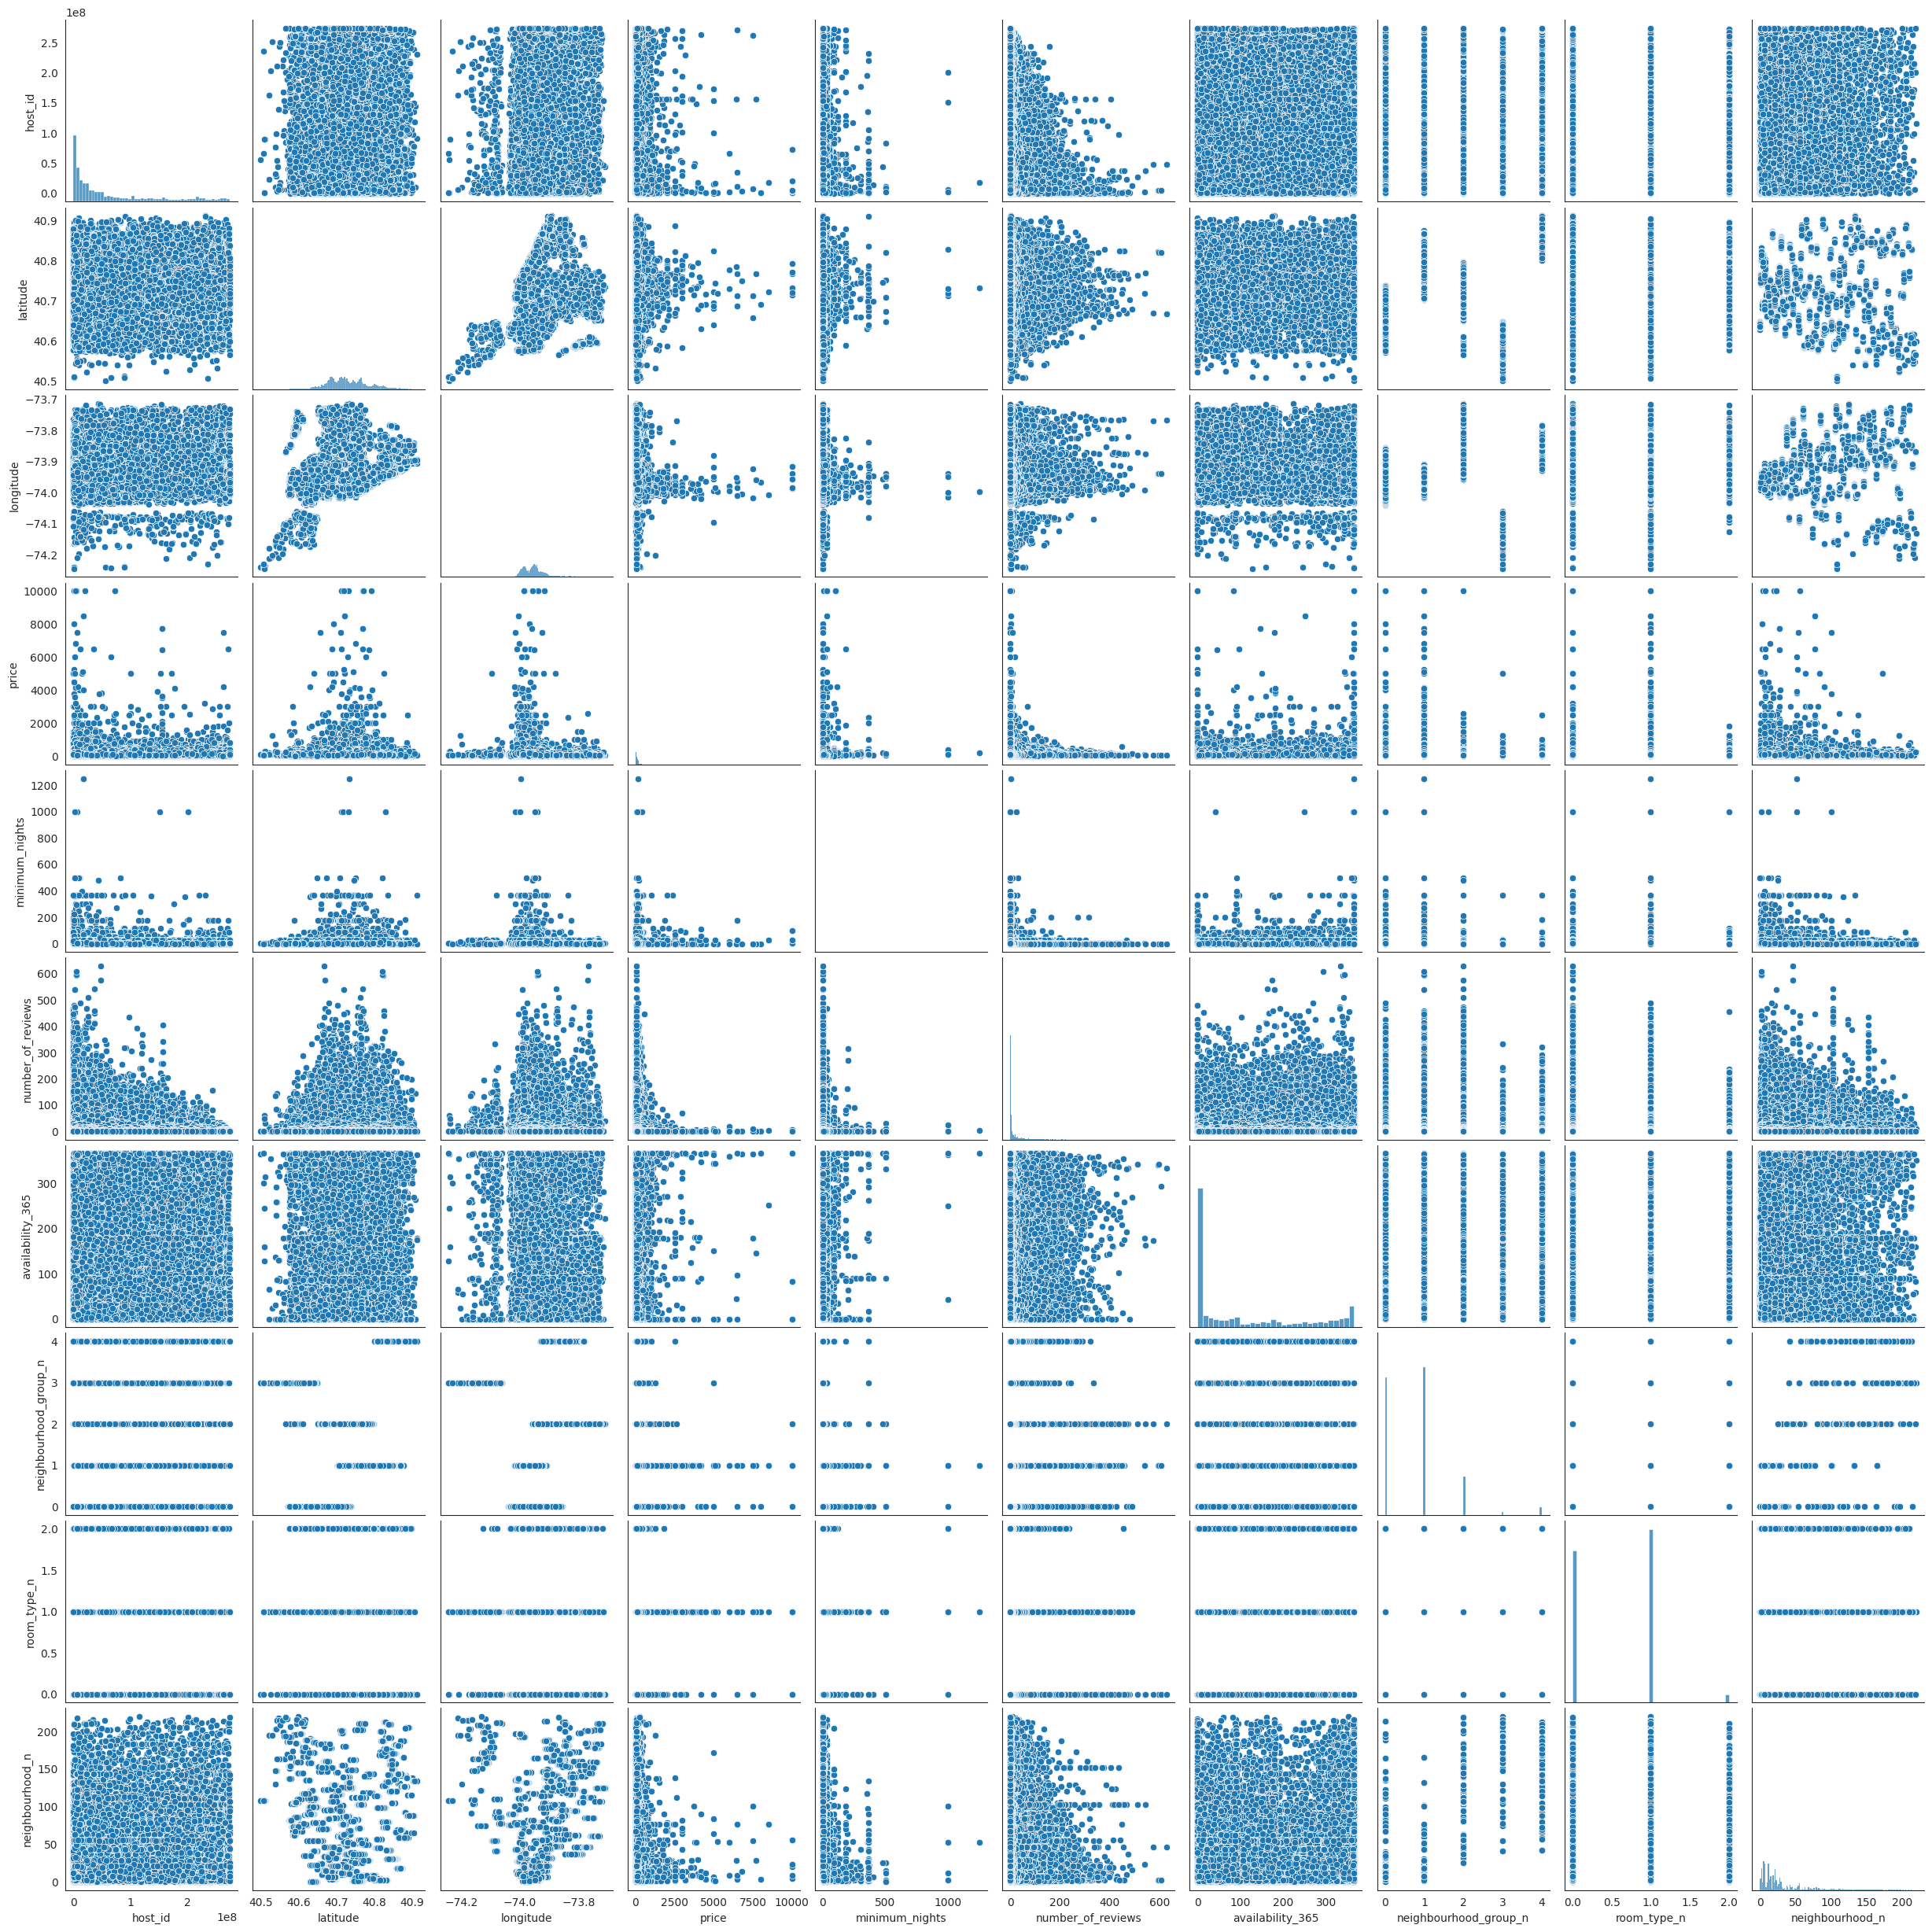

In [28]:
sns.pairplot(data = data_limpia)

In [30]:
data_limpia.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,112.781327,0.786911,0.567113,29.888782
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,131.622289,0.844386,0.541249,34.676634
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,45.000000,1.000000,1.000000,19.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,227.000000,1.000000,1.000000,37.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,365.000000,4.000000,2.000000,220.000000


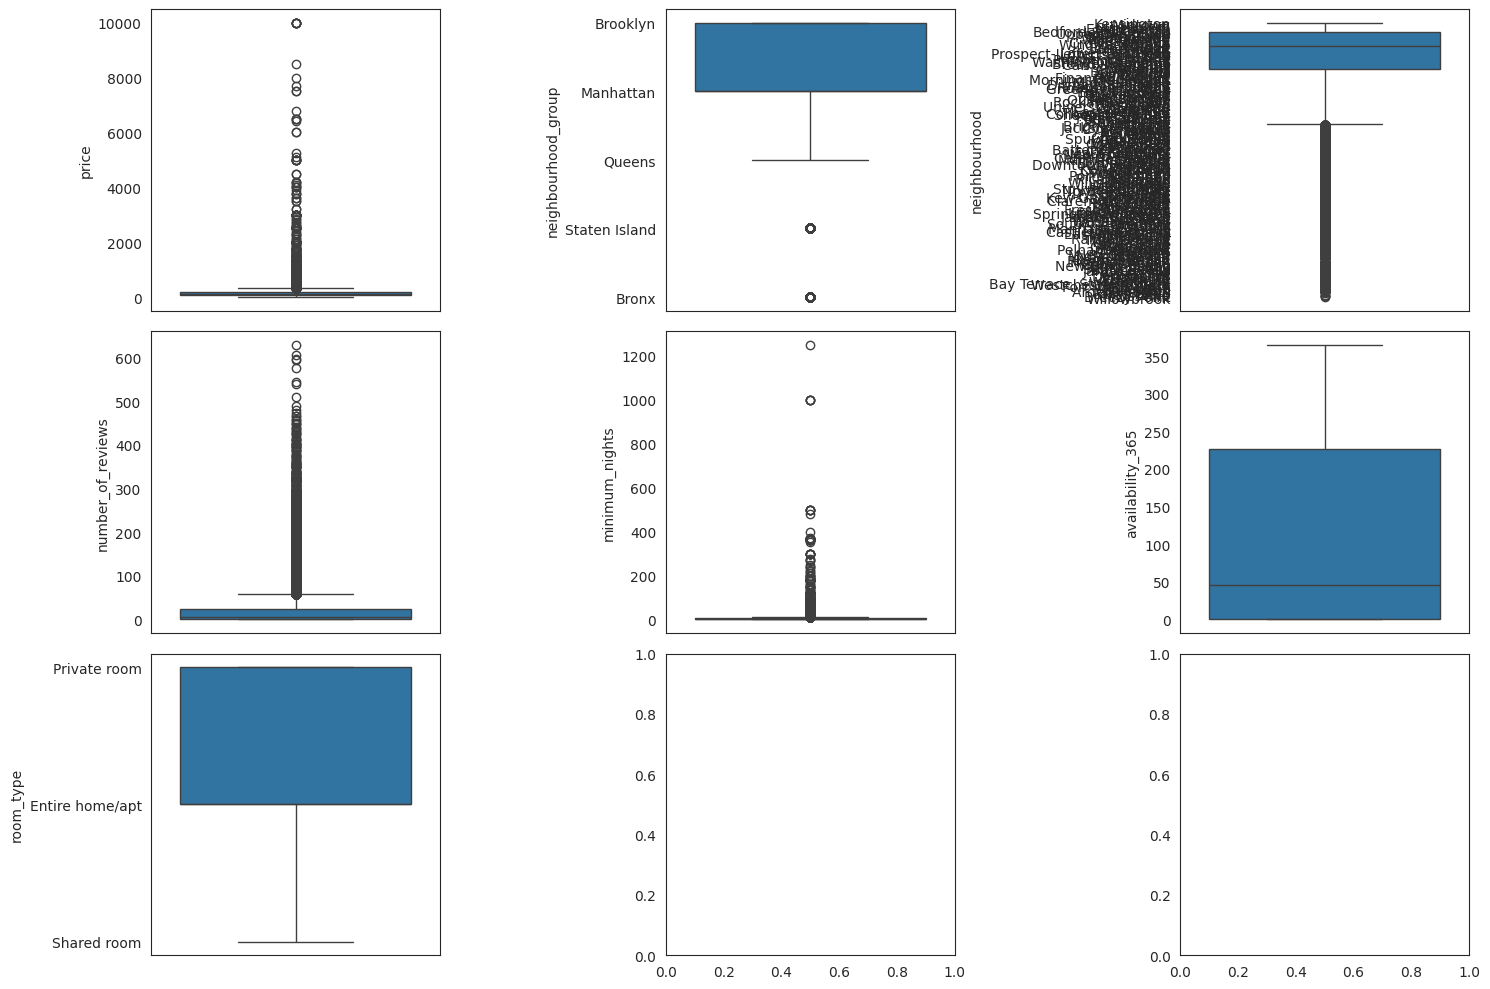

In [33]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data_limpia, y = "price")
sns.boxplot(ax = axis[0, 1], data = data_limpia, y = "neighbourhood_group")
sns.boxplot(ax = axis[0, 2], data = data_limpia, y = "neighbourhood")
sns.boxplot(ax = axis[1, 0], data = data_limpia, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = data_limpia, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = data_limpia, y = "availability_365")
sns.boxplot(ax = axis[2, 0], data = data_limpia, y = "room_type")

plt.tight_layout()

plt.show()

In [34]:
price_stats = data_limpia["price"].describe()
price_stats 

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [35]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [36]:
data_limpia[data_limpia["price"] > 500]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
85,74303,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,7,0,1,32
299,281229,Manhattan,Little Italy,40.71943,-73.99627,Entire home/apt,575,2,191,298,1,1,53
345,116599,Brooklyn,Clinton Hill,40.68613,-73.96536,Entire home/apt,650,5,0,365,0,1,3
365,417504,Brooklyn,Greenpoint,40.73861,-73.95485,Private room,599,3,9,60,0,0,20
496,836168,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48535,245712163,Brooklyn,Bedford-Stuyvesant,40.68245,-73.93417,Entire home/apt,1749,1,0,303,0,1,6
48697,273619215,Manhattan,Upper West Side,40.77665,-73.98867,Entire home/apt,750,4,0,174,1,1,8
48740,6608220,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,550,3,1,230,0,1,32
48757,11454384,Manhattan,Tribeca,40.71815,-74.01145,Entire home/apt,700,3,0,37,1,1,77


In [37]:
data_limpia.isnull().sum().sort_values(ascending=False)

host_id                  0
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
availability_365         0
neighbourhood_group_n    0
room_type_n              0
neighbourhood_n          0
dtype: int64

In [38]:
data_limpia.isnull().sum().sort_values(ascending=False) / len(data_limpia)

host_id                  0.0
neighbourhood_group      0.0
neighbourhood            0.0
latitude                 0.0
longitude                0.0
room_type                0.0
price                    0.0
minimum_nights           0.0
number_of_reviews        0.0
availability_365         0.0
neighbourhood_group_n    0.0
room_type_n              0.0
neighbourhood_n          0.0
dtype: float64

In [39]:
data_limpia["price"].fillna(data_limpia["price"].median(), inplace = True)
data_limpia["number_of_reviews"].fillna(data_limpia["number_of_reviews"].mode()[0], inplace = True)
data_limpia["minimum_nights"].fillna(data_limpia["minimum_nights"].mean(), inplace = True)

data_limpia.isnull().sum()

/tmp/ipykernel_2264/1613345203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_limpia["price"].fillna(data_limpia["price"].median(), inplace = True)
/tmp/ipykernel_2264/1613345203.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

host_id                  0
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
availability_365         0
neighbourhood_group_n    0
room_type_n              0
neighbourhood_n          0
dtype: int64

In [43]:
data_limpia["neighbourhood"] = data_limpia["room_type"] + "_" + data_limpia["availability_365"].astype(str)
data_limpia.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Private room_365,40.64749,-73.97237,Private room,149,1,9,365,0,0,0
1,2845,Manhattan,Entire home/apt_355,40.75362,-73.98377,Entire home/apt,225,1,45,355,1,1,1
2,4632,Manhattan,Private room_365,40.80902,-73.94190,Private room,150,3,0,365,1,0,2
3,4869,Brooklyn,Entire home/apt_194,40.68514,-73.95976,Entire home/apt,89,1,270,194,0,1,3
4,7192,Manhattan,Entire home/apt_0,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,1,4


In [50]:
from sklearn.model_selection import train_test_split

num_variables = ["neighbourhood_group_n", "neighbourhood_n", "number_of_reviews", "minimum_nights",
                  "availability_365", "room_type_n"]

# Dividimos el conjunto de datos en muestras de train y test
X = data_limpia.drop("price", axis = 1)[num_variables]
y = data_limpia["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group_n,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
32645,0,12,11,3,1,1
23615,1,30,2,2,0,0
31183,0,6,0,2,0,0
29260,0,6,87,3,267,1
7275,2,31,13,5,0,0


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood_group_n,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
32645,-0.931915,-0.514100,-0.277198,-0.193025,-0.852862,0.798949
23615,0.256169,0.005517,-0.479451,-0.239596,-0.860447,-1.050482
31183,-0.931915,-0.687306,-0.524396,-0.239596,-0.860447,-1.050482
29260,-0.931915,-0.687306,1.430714,-0.193025,1.164663,0.798949
7275,1.444253,0.034385,-0.232253,-0.099884,-0.860447,-1.050482


In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,neighbourhood_group_n,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
32645,0.00,0.054545,0.017488,0.001601,0.002740,0.5
23615,0.25,0.136364,0.003180,0.000801,0.000000,0.0
31183,0.00,0.027273,0.000000,0.000801,0.000000,0.0
29260,0.00,0.027273,0.138315,0.001601,0.731507,0.5
7275,0.50,0.140909,0.020668,0.003203,0.000000,0.0


In [53]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
0,12,11,3,1,1
1,30,2,2,0,0
2,6,0,2,0,0
3,6,87,3,267,1
4,31,13,5,0,0


In [54]:
X_test_sel.head()

,neighbourhood_n,number_of_reviews,minimum_nights,availability_365,room_type_n
0,0,62,3,189,1
1,44,0,21,73,0
2,7,17,2,0,0
3,43,5,2,272,1
4,4,30,2,30,1


In [55]:
X_train_sel["Survived"] = list(y_train)
X_test_sel["Survived"] = list(y_test)

In [56]:
X_train_sel.to_csv("/workspaces/machine-learning-python-template-JaironMark/src.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template-JaironMark/src.csv", index=False)
